# CRISP methodology:

1. Bussines understanding
2. Data understanding
3. Data preparation
4. Modeling
5. Evaluation
6. Deployment

## 1. Bussines understanding

Recognizing fraudulent credit card transactions is a matter of the utmost importance for banks or other credit card companies. This dataset contains transactions made by credit cards in September 2013 by European cardholders in two days and the task was to make a model which would recognize fraudulent transactions.

## 2. Data understanding

In [7]:
ls #first, we have to find out what is in our directory

Applications/   Downloads/      Music/          Untitled.ipynb
Desktop/        Library/        Pictures/       opt/
Documents/      Movies/         Public/


In [9]:
cd Downloads #then we change directory to one where our csv file is - in our case it is the Downloads directory

/Users/danilojanjusevic/Downloads


In [10]:
import pandas as pd #importing pandas library for loading csv file, pd - shortcut
import seaborn as sns #importing seaborn library for visualisation, sns - shortcut
import matplotlib.pyplot as plt #importing matplotlib library for visualisation, plt - shortcut
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from scipy.stats import multivariate_normal
from sklearn.metrics import f1_score, confusion_matrix, classification_report, precision_recall_fscore_support
credit_cards_df=pd.read_csv("creditcard.csv") #reading the csv file

In [11]:
credit_cards_df.head() #view of first 5 dataset rows

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:
type(credit_cards_df) #type of data structure in which we loaded our csv file

pandas.core.frame.DataFrame

In [13]:
credit_cards_df.shape #shape of dataset

(284807, 31)

In [14]:
columns=credit_cards_df.columns #view of all names of columns

In [15]:
columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [16]:
set(credit_cards_df["Class"]) #unique values of the Class attribute (feature)

{0, 1}

In [19]:
credit_cards_df.dtypes #finding out types of our attributes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [20]:
credit_cards_df.isnull().sum() #sum of all null values

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [21]:
credit_cards_trustworthy=credit_cards_df.loc[credit_cards_df["Class"]==0]
credit_cards_fraudulent=credit_cards_df.loc[credit_cards_df["Class"]==1]

print("Shape of trustworthy: ",credit_cards_trustworthy.shape)
print("Shape of fraudulent: ",credit_cards_fraudulent.shape)

print("This dataset contains  ", round(100*credit_cards_fraudulent.shape[0]/credit_cards_df.shape[0],3), "% of fraudulent transactions.")

Shape of trustworthy:  (284315, 31)
Shape of fraudulent:  (492, 31)
This dataset contains   0.173 % of fraudulent transactions.


Text(0, 0.5, 'Number of transactions')

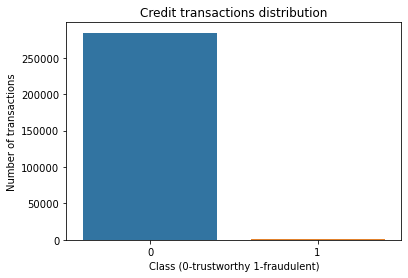

In [25]:
sns.countplot(credit_cards_df["Class"],data=credit_cards_df)

plt.title("Credit transactions distribution")
plt.xlabel("Class (0-trustworthy 1-fraudulent)")
plt.ylabel("Number of transactions")



<AxesSubplot:title={'center':'Correlation matrix'}>

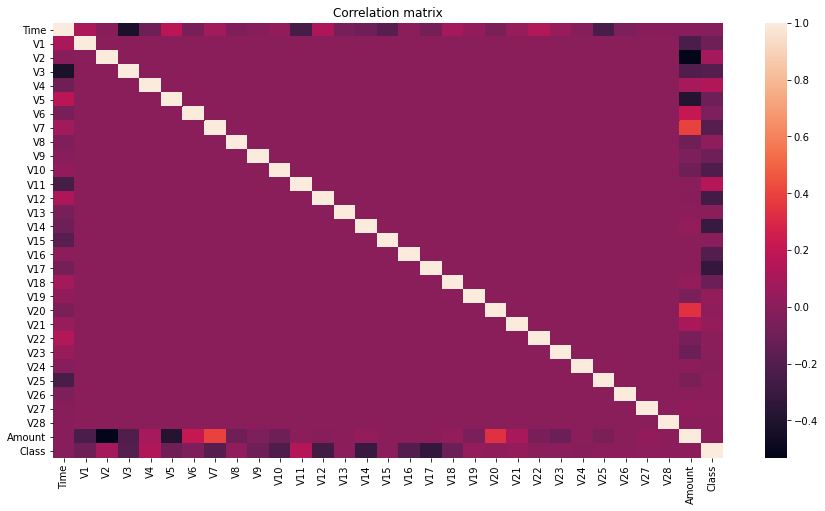

In [26]:
corr_matrix=credit_cards_df.corr()

plt.figure(figsize=[15,8])
plt.title("Correlation matrix")
sns.heatmap(data=corr_matrix)

In [27]:
corr_matrix

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


In [24]:
import warnings
warnings.filterwarnings('ignore')

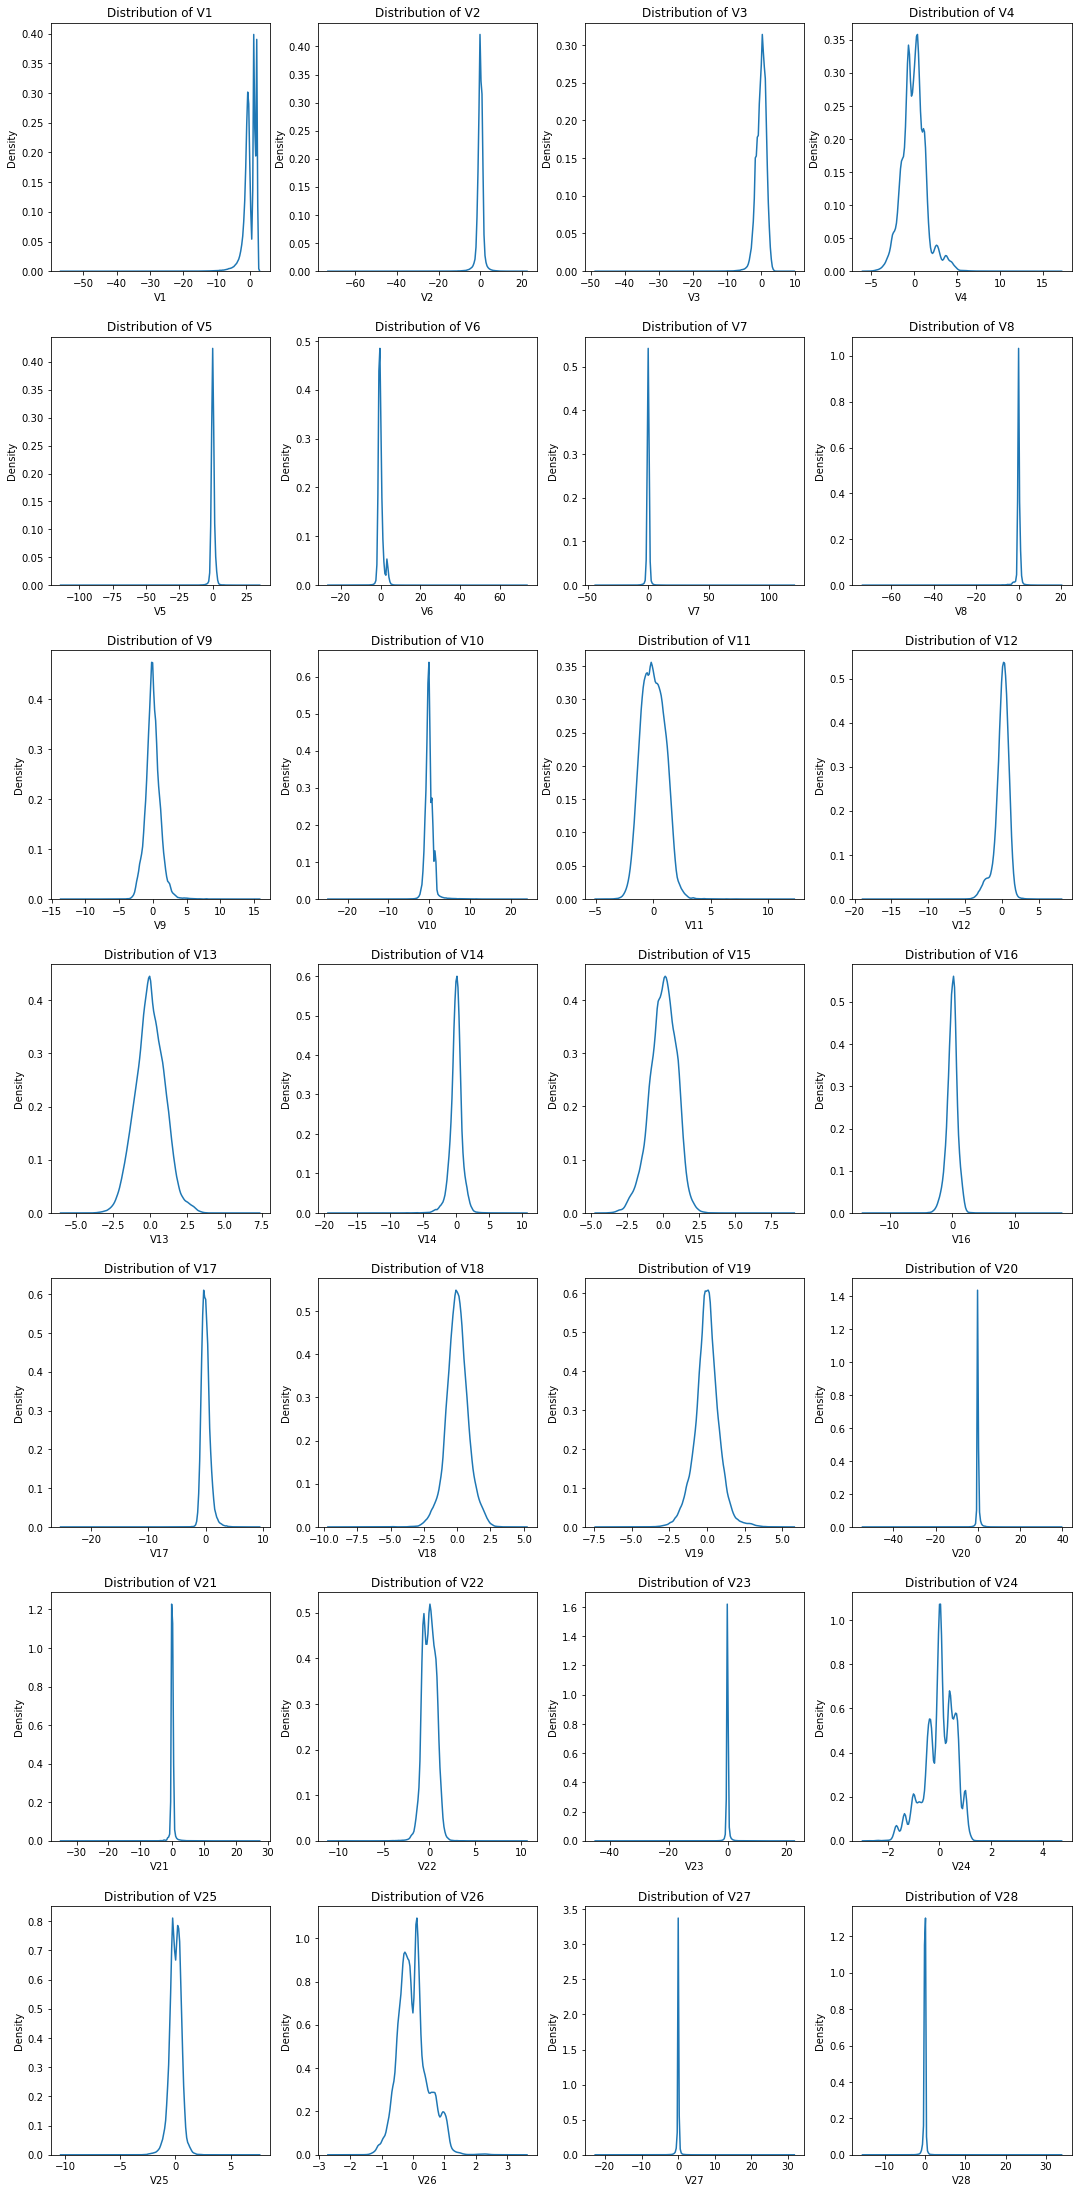

In [89]:
j=0
k=0
l=0
f, axes = plt.subplots(7, 4,figsize=(15,15))
f.tight_layout() 
plt.subplots_adjust(top=2)

for i in range(len(columns)):
    if(columns[i].startswith("V")):
        if(j%4==0):
            k=0
            l=l+1
        axes[l-1][k].title.set_text("Distribution of V"+str(j+1))
        sns.kdeplot(credit_cards_df["V"+str(j+1)],ax=axes[l-1][k])
        k=k+1
        j=j+1


        

In [28]:
import numpy as np

In [41]:
upper_tri = corr_matrix.abs().where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.7)]
print(to_drop)

[]


In [29]:
from sklearn.preprocessing import StandardScaler

## 3. Data preparation

In [30]:
credit_cards_copy=credit_cards_df.iloc[:,0:30] #slicing original dataframe to be without Class column

In [31]:
credit_cards_copy.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [15]:
credit_cards_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [32]:
credit_cards_standardized=(credit_cards_copy-np.mean(credit_cards_copy))/np.std(credit_cards_copy)

In [33]:
credit_cards_standardized.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,0.326118,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.089611,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.680975,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.269855,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,0.529939,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403


In [81]:
scl=StandardScaler()
credit_cards_standardized2=scl.fit_transform(credit_cards_copy) #alternative way for standardization

In [34]:
credit_cards_standardized.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [35]:
only_class=credit_cards_df["Class"]

In [36]:
only_class_reshaped=only_class.values.reshape(only_class.shape[0],1)

In [37]:
data=np.concatenate((credit_cards_standardized,only_class_reshaped),axis=1)

In [38]:
data.shape

(284807, 31)

In [39]:
columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [40]:
data1=pd.DataFrame(data,columns=columns)

In [41]:
data1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964,0.0
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475,0.0
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686,0.0
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534,0.0
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403,0.0


## 4. Modeling

In [42]:
trustworthy=data1.loc[data1["Class"]==0]
fraudulent=data1.loc[data1["Class"]==1]

In [43]:
trustworthy_without_class=trustworthy[columns[:-1]]
fraudulent_without_class=fraudulent[columns[:-1]]

In [44]:
test_number=round(0.1*trustworthy_without_class.shape[0])
not_in_train_number=2*test_number
difference=not_in_train_number-test_number

shuffled_data = trustworthy_without_class.sample(frac=1, random_state=1)

X_train=shuffled_data[:-not_in_train_number].values
X_valid=np.concatenate([shuffled_data[-not_in_train_number:-difference].values,fraudulent_without_class[:round(fraudulent_without_class.shape[0]/2)]])
X_test=np.concatenate([shuffled_data[-difference:].values,fraudulent_without_class[round(fraudulent_without_class.shape[0]/2):]])
y_valid=np.concatenate([np.zeros(difference),np.ones(round(fraudulent_without_class.shape[0]/2))])
y_test=np.concatenate([np.zeros(difference),np.ones(round(fraudulent_without_class.shape[0]/2))])

print("Shape of whole dataset: "+str(data1.shape))
print("Shape of training dataset: "+str(X_train.shape))
print("Shape of validation dataset: "+str(X_valid.shape))
print("Shape of test dataset: "+str(X_test.shape))
print("Shape of validation labels: "+str(y_valid.shape))
print("Shape of test labels: "+str(y_test.shape))

Shape of whole dataset: (284807, 31)
Shape of training dataset: (227451, 30)
Shape of validation dataset: (28678, 30)
Shape of test dataset: (28678, 30)
Shape of validation labels: (28678,)
Shape of test labels: (28678,)


### 4.1. Multivariate Gaussian Distribution

In [45]:
p = multivariate_normal(mean=np.mean(X_train,axis=0), cov=np.cov(X_train.T)) #generating probability density function based on training set

probabilities_of_valid=p.pdf(X_valid) #applying probability density function on X_valid

EpsF1 = []

epsilons = [1e-10, 1e-20, 1e-30, 1e-40, 1e-50, 1e-60, 1e-70, 1e-80, 1e-90, 1e-100, 1e-110, 1e-120,
           1e-130, 1e-140, 1e-150, 1e-160, 1e-170, 1e-180, 1e-190, 1e-200, 1e-210, 1e-220, 1e-230, 1e-240]

for i in range(len(epsilons)):
    eps = epsilons[i]
    pred = (probabilities_of_valid <= eps)
    f = f1_score(y_valid, pred, average='binary')
    EpsF1.append([eps, round(f,4)])

EpsF1df = pd.DataFrame(EpsF1, columns = ['epsilon', 'F1'])
EpsF1df.head()




,epsilon,F1
0,1.000000e-10,0.0170
1,1.000000e-20,0.1445
2,1.000000e-30,0.3435
3,1.000000e-40,0.4452
4,1.000000e-50,0.5117


In [46]:
EpsF1df.loc[EpsF1df['F1'].idxmax()]

epsilon    1.000000e-150
F1          7.795000e-01
Name: 14, dtype: float64

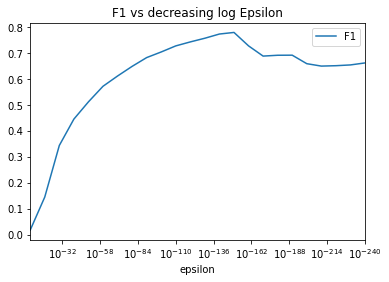

In [47]:
EpsF1df.plot.line("epsilon","F1")
plt.xscale('log')
plt.xlim(1e-10, 1e-240)
plt.title("F1 vs decreasing log Epsilon")
plt.show()

In [48]:
eps = EpsF1df.loc[EpsF1df['F1'].idxmax()]['epsilon']

print("epsilon ", eps)
print("_"*50)
pred = (probabilities_of_valid<=eps)
CM = confusion_matrix(y_valid,pred)
tn, fp, fn, tp = confusion_matrix(y_valid,pred).ravel()

print(CM)
print("_"*50)
print("TP ", tp)
print("FP ", fp)
print("TN ", tn)
print("FN ", fn)

epsilon  1e-150
__________________________________________________
[[28368    64]
 [   48   198]]
__________________________________________________
TP  198
FP  64
TN  28368
FN  48


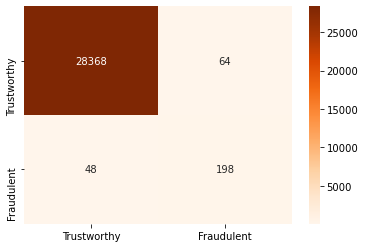

In [49]:
classes=["Trustworthy","Fraudulent"]

df_cm = pd.DataFrame(CM, index=classes, columns=classes)


ax = sns.heatmap(df_cm, cmap='Oranges', annot=True, fmt='g')

### 4.2. Autoencoders

In [50]:
input_dim = X_train.shape[1]
encoding_dim = 16

In [51]:
input_layer = Input(shape=(input_dim, ))

encoder = Dense(encoding_dim, activation="tanh", 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="tanh")(encoder)

decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)
decoder = Dense(input_dim,activation="relu")(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)

In [56]:
autoencoder.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 30)]              0         
_________________________________________________________________
dense_20 (Dense)             (None, 16)                496       
_________________________________________________________________
dense_21 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_22 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_23 (Dense)             (None, 30)                270       
Total params: 974
Trainable params: 974
Non-trainable params: 0
_________________________________________________________________


In [57]:
epochs = 10
batch_size = 32

autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])

# Istraziti:
# early stopping
# modelcheckpoint
# Kako da izaberemo broj epoha i batch size?

history = autoencoder.fit(X_train, X_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_valid, X_valid)).history

Epoch 1/10
7108/7108 [==============================] - 5s 689us/step - loss: 0.7554 - accuracy: 0.4505 - val_loss: 0.9014 - val_accuracy: 0.5221
Epoch 2/10
7108/7108 [==============================] - 5s 674us/step - loss: 0.6961 - accuracy: 0.5546 - val_loss: 0.8780 - val_accuracy: 0.5696
Epoch 3/10
7108/7108 [==============================] - 5s 677us/step - loss: 0.6832 - accuracy: 0.5788 - val_loss: 0.8676 - val_accuracy: 0.5771
Epoch 4/10
7108/7108 [==============================] - 5s 679us/step - loss: 0.6759 - accuracy: 0.5817 - val_loss: 0.8622 - val_accuracy: 0.5808
Epoch 5/10
7108/7108 [==============================] - 5s 681us/step - loss: 0.6706 - accuracy: 0.5861 - val_loss: 0.8599 - val_accuracy: 0.5852
Epoch 6/10
7108/7108 [==============================] - 5s 684us/step - loss: 0.6673 - accuracy: 0.5905 - val_loss: 0.8581 - val_accuracy: 0.5841
Epoch 7/10
7108/7108 [==============================] - 5s 688us/step - loss: 0.6646 - accuracy: 0.5907 - val_loss: 0.8578 -

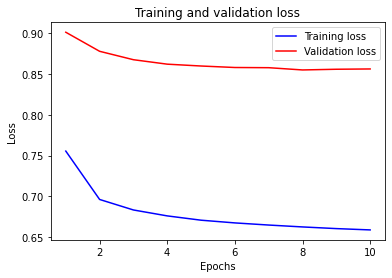

In [58]:
plt.clf()
history_dict = history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (len(history_dict['loss']) + 1))
plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# istraži tipove mimoilaženja grešaka, train validation loss type of graphs

In [59]:
evaluation=autoencoder.evaluate(x=X_valid,y=y_valid)

897/897 [==============================] - 1s 747us/step - loss: 0.3098 - accuracy: 0.0952


In [62]:
autoencoder_predictions_valid = autoencoder.predict(X_valid)

autoencoder_mse_valid= np.mean(np.power(X_valid - autoencoder_predictions_valid, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': autoencoder_mse_valid,
                        'true_class': y_valid})
print('mean error of recon on TEST', round(error_df.reconstruction_error.mean(),2))


ReconError = 4.0

pred = [1 if e > ReconError else 0 for e in error_df.reconstruction_error.values]

f = f1_score(y_valid, pred, average='binary')
print("F1 score on test", round(f,4), " with reconstruction error  ", ReconError)

mean error of recon on TEST 0.86
F1 score on test 0.5172  with reconstruction error   4.0


In [63]:
minRE = 1
maxRE = 50
    
RE_list = []

for TryRE in range(minRE,maxRE):
    pred = [1 if e > TryRE else 0 for e in error_df.reconstruction_error.values]
    f = f1_score(y_valid, pred, average='binary')
    RE_list.append([TryRE, round(f,4)])
    
RE_F1_df= pd.DataFrame(RE_list, columns = ['ReconError', 'F1'])
RE_F1_df.head()

,ReconError,F1
0,1,0.1495
1,2,0.3492
2,3,0.4503
3,4,0.5172
4,5,0.5030


In [65]:
RE_F1_df.loc[RE_F1_df['F1'].idxmax()]

ReconError    8.0000
F1            0.5522
Name: 7, dtype: float64

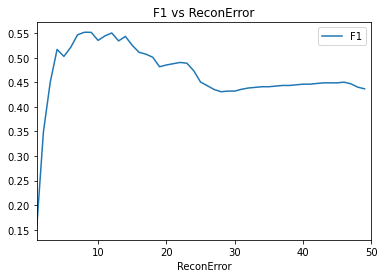

In [66]:
RE_F1_df.plot.line("ReconError","F1")
plt.xlim(1, 50)
plt.title("F1 vs ReconError")
plt.show()

### 4.3. Local Outlier Factor 

In [52]:
from sklearn.neighbors import LocalOutlierFactor

In [72]:
n_outliers=len(y_valid[y_valid==1])
n_inliers=len(X_valid)-n_outliers

perc_fraud=n_outliers/X_valid.shape[0]

ground_truth = np.ones(len(X_valid), dtype=int)
ground_truth[-n_outliers:] = -1



In [73]:
perc_fraud

0.008578004044912477

In [74]:
clf = LocalOutlierFactor(n_neighbors=20, contamination = perc_fraud)

In [71]:
clf

LocalOutlierFactor(contamination=0.008578004044912477)

In [75]:
y_pred = clf.fit_predict(X_valid)

In [83]:
print('accuracy ' , round(1 - (n_errors / X_valid.shape[0]),4))

accuracy  0.9836


In [92]:
minNeighbours = 100
maxNeighbours = 1000
    
neighboursF1 = []

for neighbour in range(minNeighbours,maxNeighbours,100):
    clf = LocalOutlierFactor(n_neighbors=neighbour, contamination = perc_fraud)
    y_pred = clf.fit_predict(X_valid)
    n_errors = (y_pred != ground_truth).sum()
    scores = clf.negative_outlier_factor_
    
    y_predLOF = y_pred.copy()
    y_predDF = pd.DataFrame(y_predLOF)
    
    y_predDF[y_predDF[0] == 1] = 0
    y_predDF[y_predDF[0] == -1] = 1
    
    y_predLOF = y_predDF.values
    y_predLOF = np.ravel(y_predLOF)
    
    precision,recall,fbeta_score, support  = precision_recall_fscore_support(y_valid, y_predLOF, average='binary')
    
    print("F1 score on test", round(fbeta_score,4), " with num neighbors ", neighbour)
    neighboursF1.append([neighbour, round(fbeta_score,4)])
    
neighboursF1df = pd.DataFrame(neighboursF1, columns = ['NumNeighb', 'F1'])
neighboursF1df.head()

F1 score on test 0.1545  with num neighbors  100
F1 score on test 0.3374  with num neighbors  200
F1 score on test 0.5976  with num neighbors  300
F1 score on test 0.6341  with num neighbors  400
F1 score on test 0.626  with num neighbors  500
F1 score on test 0.5935  with num neighbors  600
F1 score on test 0.5732  with num neighbors  700
F1 score on test 0.5569  with num neighbors  800
F1 score on test 0.5488  with num neighbors  900


,NumNeighb,F1
0,100,0.1545
1,200,0.3374
2,300,0.5976
3,400,0.6341
4,500,0.6260


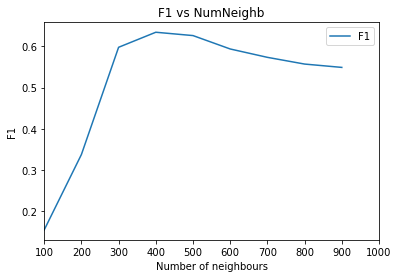

In [94]:
neighboursF1df.plot.line("NumNeighb","F1")
plt.xlim(100, 1000)
plt.xlabel("Number of neighbours")
plt.ylabel("F1")
plt.title("F1 vs NumNeighb")
plt.show()

### 4.4. Robust Covariance

In [96]:
from sklearn.covariance import EllipticEnvelope

In [99]:
minFraction = 0.7
maxFraction = 0.99
    
fractionsF1 = []

for fraction in np.arange(minFraction, maxFraction, 0.01):
    cov = EllipticEnvelope(support_fraction = fraction, contamination = perc_fraud)
    y_pred = cov.fit_predict(X_valid)
    n_errors = (y_pred != ground_truth).sum()
    
    y_predLOF = y_pred.copy()
    y_predDF = pd.DataFrame(y_predLOF)
    
    y_predDF[y_predDF[0] == 1] = 0
    y_predDF[y_predDF[0] == -1] = 1
    
    y_predLOF = y_predDF.values
    y_predLOF = np.ravel(y_predLOF)
    
    precision,recall,fbeta_score, support  = precision_recall_fscore_support(y_valid, y_predLOF, average='binary')
    
    print("F1 score on test", round(fbeta_score,4), " with support_fraction ", fraction)
    fractionsF1.append([fraction, round(fbeta_score,4)])
    
fractionsF1df = pd.DataFrame(fractionsF1, columns = ['SupFrac', 'F1'])
fractionsF1df.head()

F1 score on test 0.4634  with support_fraction  0.7
F1 score on test 0.4472  with support_fraction  0.71
F1 score on test 0.4634  with support_fraction  0.72
F1 score on test 0.4634  with support_fraction  0.73
F1 score on test 0.4634  with support_fraction  0.74
F1 score on test 0.4675  with support_fraction  0.75
F1 score on test 0.4634  with support_fraction  0.76
F1 score on test 0.4675  with support_fraction  0.77
F1 score on test 0.4675  with support_fraction  0.78
F1 score on test 0.4634  with support_fraction  0.79
F1 score on test 0.4675  with support_fraction  0.8
F1 score on test 0.4675  with support_fraction  0.81
F1 score on test 0.4675  with support_fraction  0.8200000000000001
F1 score on test 0.4675  with support_fraction  0.8300000000000001
F1 score on test 0.4675  with support_fraction  0.8400000000000001
F1 score on test 0.4715  with support_fraction  0.8500000000000001
F1 score on test 0.4797  with support_fraction  0.8600000000000001
F1 score on test 0.4878  with s

,SupFrac,F1
0,0.70,0.4634
1,0.71,0.4472
2,0.72,0.4634
3,0.73,0.4634
4,0.74,0.4634


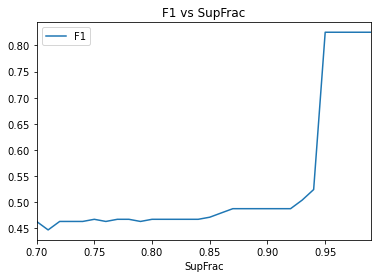

In [101]:
fractionsF1df.plot.line("SupFrac","F1")
plt.xlim(minFraction, maxFraction)
plt.title("F1 vs SupFrac")
plt.show()

### 4.5. Isolation Forest

In [103]:
from sklearn.ensemble import IsolationForest

In [106]:
min_n_estimators = 700
max_n_estimators = 1200
    
n_estimators_F1 = []

for i in np.arange(min_n_estimators, max_n_estimators, 50):
    isofo = IsolationForest(n_estimators = i, max_features = 1.0, max_samples=1.0, bootstrap=False, random_state=22,contamination = perc_fraud)

    y_pred = isofo.fit_predict(X_valid)
    n_errors = (y_pred != ground_truth).sum()
    
    y_predLOF = y_pred.copy()
    y_predDF = pd.DataFrame(y_predLOF)
    
    y_predDF[y_predDF[0] == 1] = 0
    y_predDF[y_predDF[0] == -1] = 1
    
    y_predLOF = y_predDF.values
    y_predLOF = np.ravel(y_predLOF)
    
    precision,recall,fbeta_score, support  = precision_recall_fscore_support(y_valid, y_predLOF, average='binary')
    
    print("F1 score on test", round(fbeta_score,4), " with num_estimators ", i)
    n_estimators_F1.append([i, round(fbeta_score,4)])
    
n_estimators_F1_df = pd.DataFrame(n_estimators_F1, columns = ['NumEstim', 'F1'])
n_estimators_F1_df.head()

F1 score on test 0.5203  with num_estimators  700
F1 score on test 0.5203  with num_estimators  750
F1 score on test 0.5244  with num_estimators  800
F1 score on test 0.5244  with num_estimators  850
F1 score on test 0.5285  with num_estimators  900
F1 score on test 0.5285  with num_estimators  950
F1 score on test 0.5285  with num_estimators  1000
F1 score on test 0.5285  with num_estimators  1050
F1 score on test 0.5285  with num_estimators  1100
F1 score on test 0.5285  with num_estimators  1150


,NumEstim,F1
0,700,0.5203
1,750,0.5203
2,800,0.5244
3,850,0.5244
4,900,0.5285


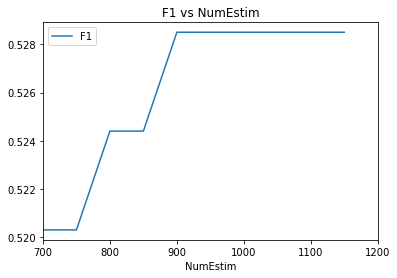

In [107]:
n_estimators_F1_df.plot.line("NumEstim","F1")
plt.xlim(min_n_estimators, max_n_estimators)
plt.title("F1 vs NumEstim")
plt.show()